In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact
import pandas as pd
from numpy import cos,sin,pi,dot,arccos 
from numpy.linalg import norm # this is the magnitude function
from mpl_toolkits.mplot3d import axes3d
from itertools import combinations

plt.rcParams["figure.figsize"] = [8, 8]

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

<style>
td {
  font-size: 20px;
}
</style>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# Warm up 

Please answer the following (not serious) survey.

## [https://tinyurl.com/rlma4z8](https://tinyurl.com/rlma4z8)

In [2]:
IFrame("https://docs.google.com/forms/d/e/1FAIpQLSeJFwqIt4yt5PtuyM5P7DOTuCOFfFNu2MNbZRHH-i-t5dUfaw/viewform?embedded=true",width=640,height=1549)

# Application: Dot Products and Match-making

We collect the above survey data and store each individuals ratings as a vector in $\RR^5$. We subtract 5 from each entry so the "neutral" vector $\langle 5,5,5,5,5 \rangle$ is translated to the origin. 

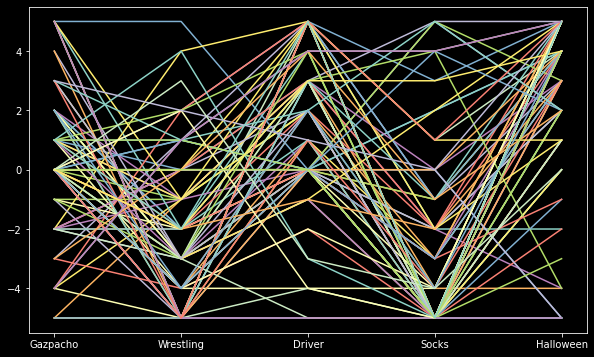

In [3]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQo8Y7wh33vZv9uYdewzwASSfYXQsPEGWldt_lWk8MPBYnBxKprcysZ-u9hjqPIWIeqndB4f-U1oAoM/pub?gid=1201323166&single=true&output=csv"
responses = pd.read_csv(url)
qs = ['Gazpacho', 'Wrestling',
       'Driver', 'Socks',
       'Halloween']
responses.columns = ['Timestamp', 'Name'] + qs
answers = responses[qs].to_numpy() - 5
plt.figure(figsize=((10,6)))
plt.plot(np.transpose(answers));
plt.xticks(ticks=range(5),labels=qs);
# plt.legend(responses.Name,loc='upper right');
# responses

Then we pair-wise measure the angle (or, really the cosine of the angle) between the data points. The pairs are then ranked on who points most "in the same direction."

In [4]:
out = []
for x,y in combinations(responses.index,2):
    xinfo,yinfo = responses.loc[[x,y],qs].to_numpy() - 5

    ## This is the magic
    compat = dot(xinfo,yinfo)/(norm(xinfo)*norm(yinfo))
    
    out.append([responses.loc[x,"Name"],responses.loc[y,"Name"],compat])

results = pd.DataFrame(out,columns=["Name1","Name2","Compat"]).sort_values("Compat",ascending=False)
results.head(20)

,Name1,Name2,Compat
4025,cabbage,cabbage,1.000000
3100,Meghan,my name is jeff,1.000000
2726,hello :),silly goose,1.000000
3908,A,Anthony Rostek,0.995893
2163,Bollinger,Super Mario,0.995871
1854,Diana,Aaaa,0.994536
2723,hello :),Meghan,0.993884
2764,hello :),my name is jeff,0.993884
3229,silly goose,my name is jeff,0.993884
3062,Meghan,silly goose,0.993884


In [5]:
results.tail()

,Name1,Name2,Compat
4013,mr steal yo girl,cabbage,-0.935775
778,Jake,Appa,-0.939336
3903,Eze,fake name,-0.967620
3139,Tom,Talmadge MacGulager,-0.980379
2421,:P,Eze,-0.995345


In [6]:
## Filter on a particular name here. 
search_string = "Bollinger"
results[results.Name1.str.contains(search_string) | results.Name2.str.contains(search_string) ]

,Name1,Name2,Compat
2163,Bollinger,Super Mario,0.995871
418,Gucchi,Lee Bollinger,0.981981
3773,Calculating Alien,Lee Bollinger,0.898545
2190,Bollinger,mr steal yo girl,0.890734
2057,Hikaru,Lee Bollinger,0.869626
...,...,...,...
503,Quinn,Lee Bollinger,-0.758247
2193,Bollinger,sauce,-0.767337
2143,Bollinger,swag,-0.800641
2200,Bollinger,cabbage,-0.804280


<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>